# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df = pd.read_csv('data/comprar_alquilar.csv')
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [5]:
df['estado_civil'].unique()

array([0, 1, 2], dtype=int64)

In [6]:
df.groupby('estado_civil')['hijos'].mean()

estado_civil
0    0.029412
1    2.000000
2    1.712329
Name: hijos, dtype: float64

In [7]:
df['trabajo'].unique()

array([2, 6, 8, 3, 5, 1, 7, 0, 4], dtype=int64)

In [8]:
df.groupby('trabajo')['ingresos'].mean()

trabajo
0    5393.750000
1    4665.666667
2    4533.166667
3    5341.761905
4    5109.368421
5    5139.032258
6    4940.391304
7    4704.148148
8    4849.379310
Name: ingresos, dtype: float64

In [9]:
df.groupby('trabajo')['hijos'].mean()

trabajo
0    0.000000
1    0.000000
2    0.111111
3    0.000000
4    0.000000
5    2.225806
6    2.347826
7    2.185185
8    2.241379
Name: hijos, dtype: float64

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [13]:
df['comprar'].value_counts(normalize='true')

0    0.668317
1    0.331683
Name: comprar, dtype: float64

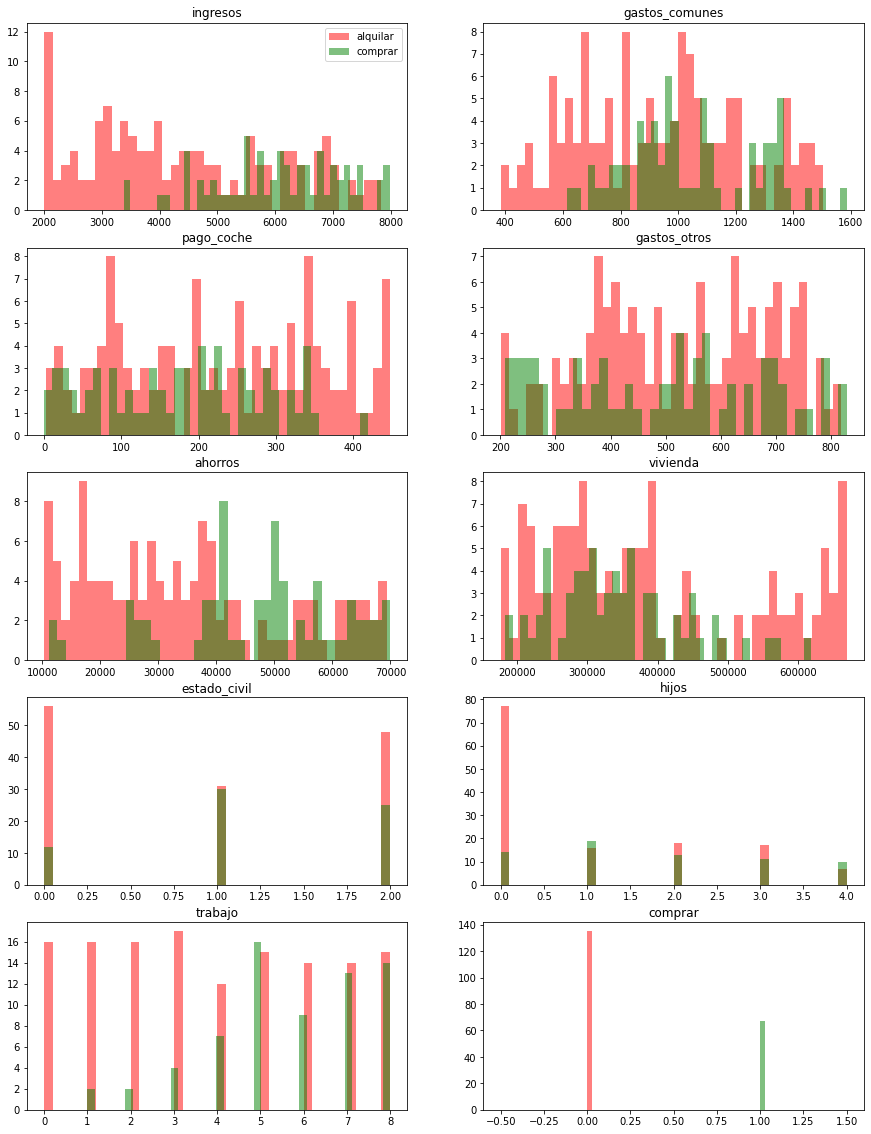

In [12]:
fig, axes = plt.subplots(5,2, figsize=(15,20))
alquilar = df[df['comprar']==0]
comprar = df[df['comprar']==1]
axes = axes.ravel()
for i in range(len(df.columns)):
    axes[i].hist(alquilar.values[:,i], bins=40, color='r', alpha=0.5)
    axes[i].hist(comprar.values[:,i], bins=40, color='g', alpha=0.5)
    axes[i].set_title(df.columns[i])

axes[0].legend(['alquilar', 'comprar'])

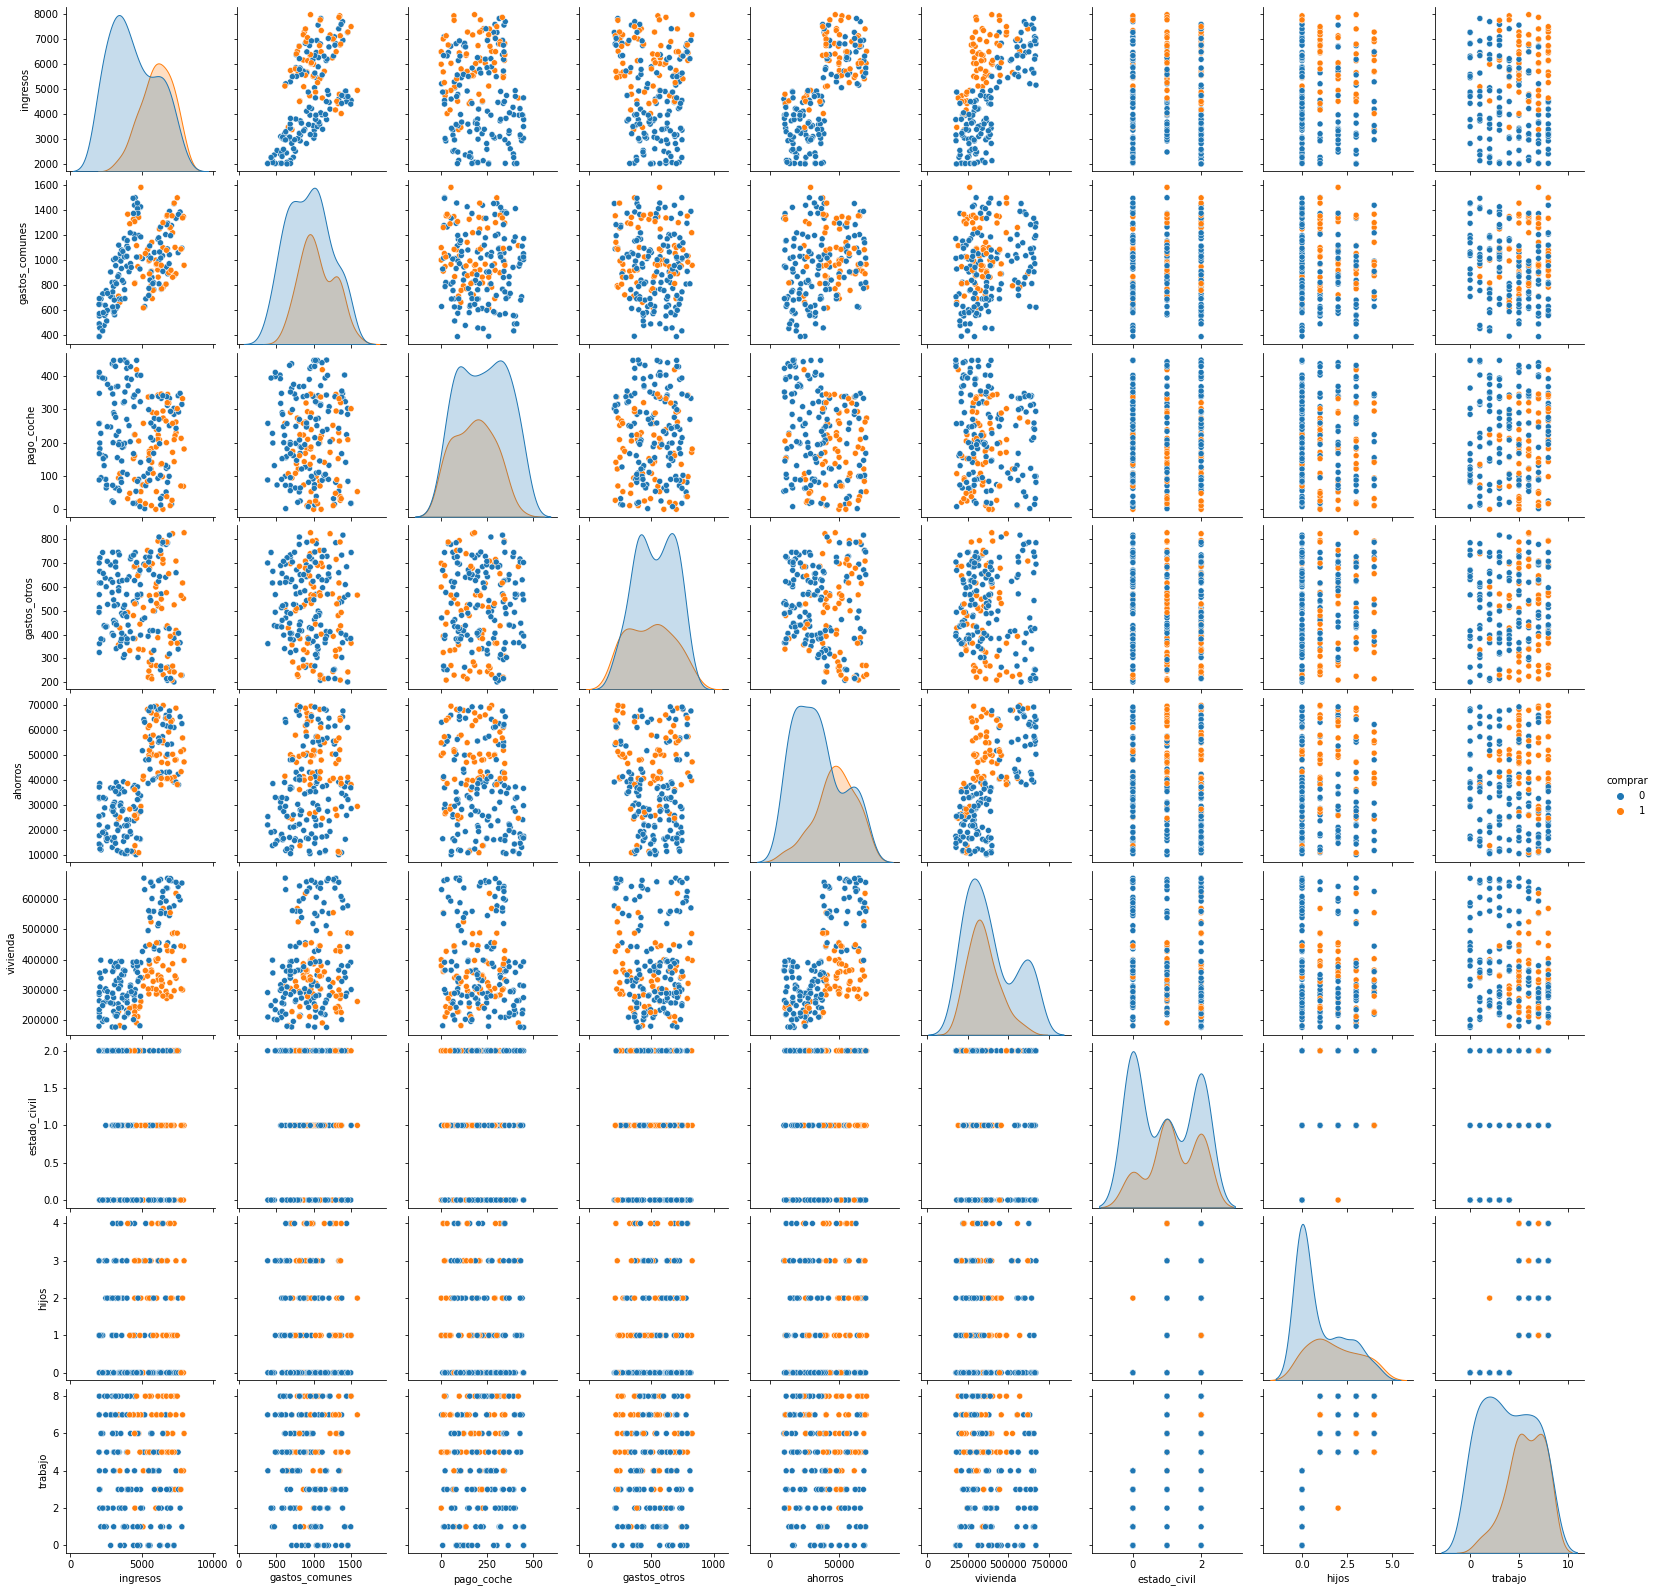

In [15]:
sns.pairplot(df, hue='comprar')

<AxesSubplot:>

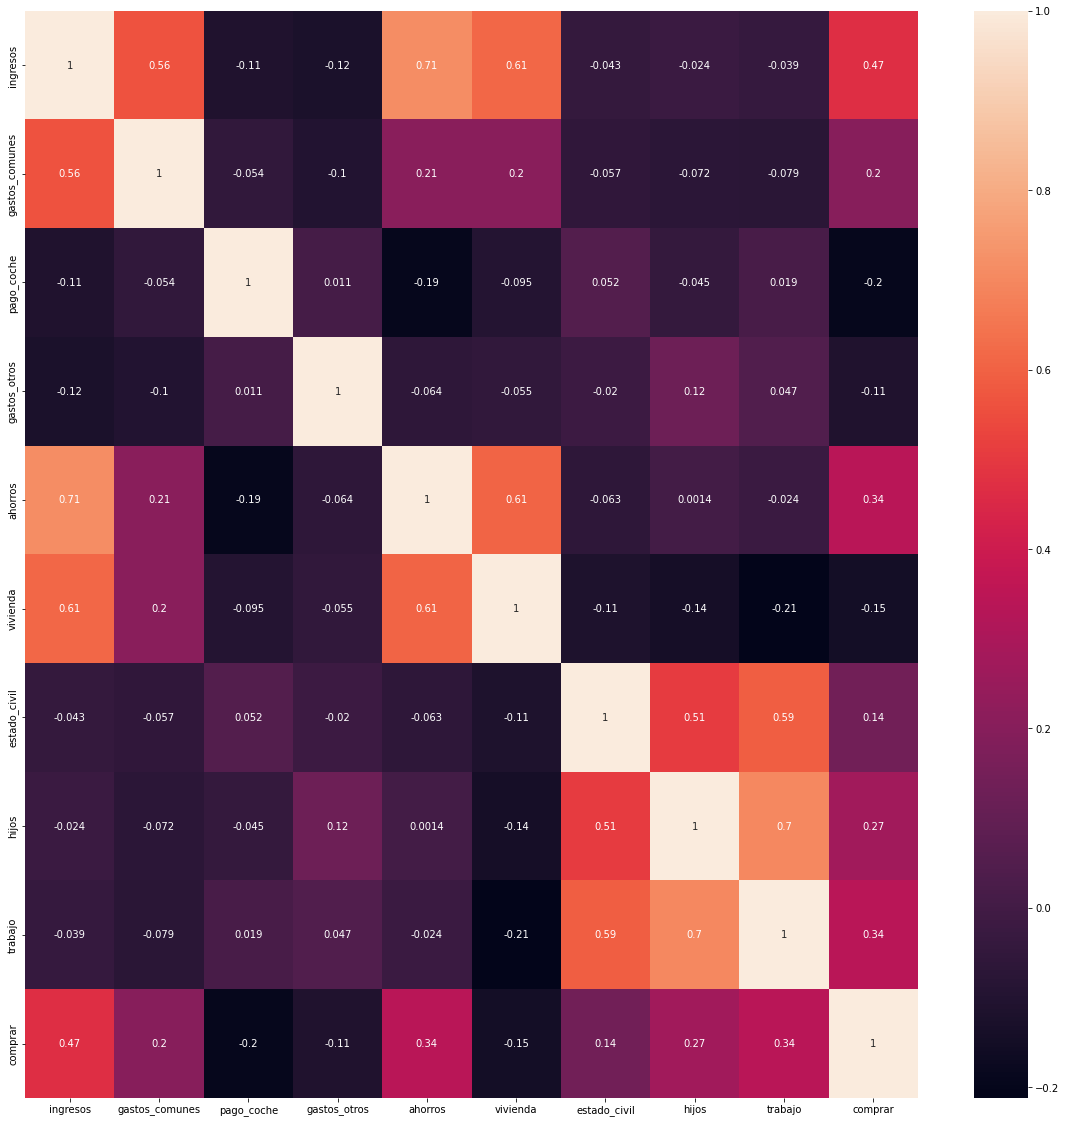

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [18]:
scaler = StandardScaler()
X = df.drop(columns=['comprar'])
y = df['comprar']

In [19]:
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled.shape

(202, 9)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [22]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [23]:
X_pca.shape

(202, 9)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [24]:
pca.explained_variance_ratio_

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [25]:
pca.explained_variance_ratio_.cumsum()

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621,
       0.90870487, 0.95016066, 0.98033885, 1.        ])

In [26]:
pca.explained_variance_ratio_.cumsum()[:5]

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621])

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

Text(0, 0.5, 'cumulative explained variance')

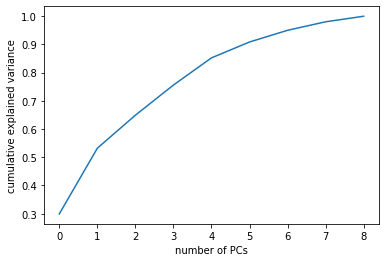

In [27]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('number of PCs')
plt.ylabel('cumulative explained variance')

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

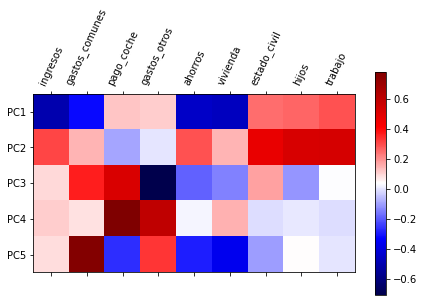

In [34]:
plt.matshow(pca.components_[:5], cmap='seismic')
plt.yticks([0,1,2,3,4], ['PC1', 'PC2', 'PC3','PC4','PC5'])
plt.xticks(range(len(X.columns)), X.columns, rotation=65)
plt.colorbar()
plt.show()


In [35]:
pd.DataFrame(data=pca.components_[:5], columns=X.columns, index=['PC1', 'PC2', 'PC3','PC4','PC5'])

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
PC1,-0.493720,-0.318229,0.123771,0.111876,-0.444650,-0.462609,0.252279,0.259859,0.290248
PC2,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
PC3,0.091419,0.363453,0.516144,-0.701986,-0.191767,-0.140513,0.172885,-0.112184,0.036910
PC4,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
PC5,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009


## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [38]:
from random import random


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [39]:
pipe = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('pca', PCA(n_components=5)),
                    ('knn', KNeighborsClassifier())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('knn', KNeighborsClassifier())])

In [40]:
pipe2 = make_pipeline(StandardScaler(), PCA(n_components=5),KNeighborsClassifier())
pipe2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [41]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('knn', KNeighborsClassifier())])

In [42]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [44]:
print('Accuracy', accuracy_score(y_test,y_pred))

Accuracy 0.7804878048780488


In [45]:
confusion_matrix(y_test,y_pred)

array([[22,  2],
       [ 7, 10]], dtype=int64)

In [46]:
pipe = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('pca', PCA()),
                    ('knn', KNeighborsClassifier())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('knn', KNeighborsClassifier())])

In [47]:
params = {
        'pca__n_components': list(range(1,10)),
        'knn__n_neighbors': list(range(1,20))
}
gs = GridSearchCV(pipe, params, cv=10, scoring='accuracy')

In [48]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [49]:
gs.best_score_

0.8886029411764707

In [50]:
gs.best_params_

{'knn__n_neighbors': 7, 'pca__n_components': 8}

In [51]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [53]:
y_pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, y_pred)

0.8048780487804879

In [54]:
import pickle

with open('my_model', 'wb') as archivo_salida:
    pickle.dump(gs.best_estimator_, archivo_salida)

In [55]:
with open('my_model', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [57]:
loaded_model.score(X_test,y_test)

0.8048780487804879

In [58]:
loaded_model.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)